### Credit Card Customer Segmentation using K-Means in Python

In [74]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [75]:
df = pd.read_csv("customer_segmentation.csv")
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [77]:
df["marital_status"].value_counts()

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [78]:
df["gender"].value_counts()

gender
F    5358
M    4769
Name: count, dtype: int64

In [79]:
df["education_level"].value_counts()

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

In [80]:
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


### Visualizations

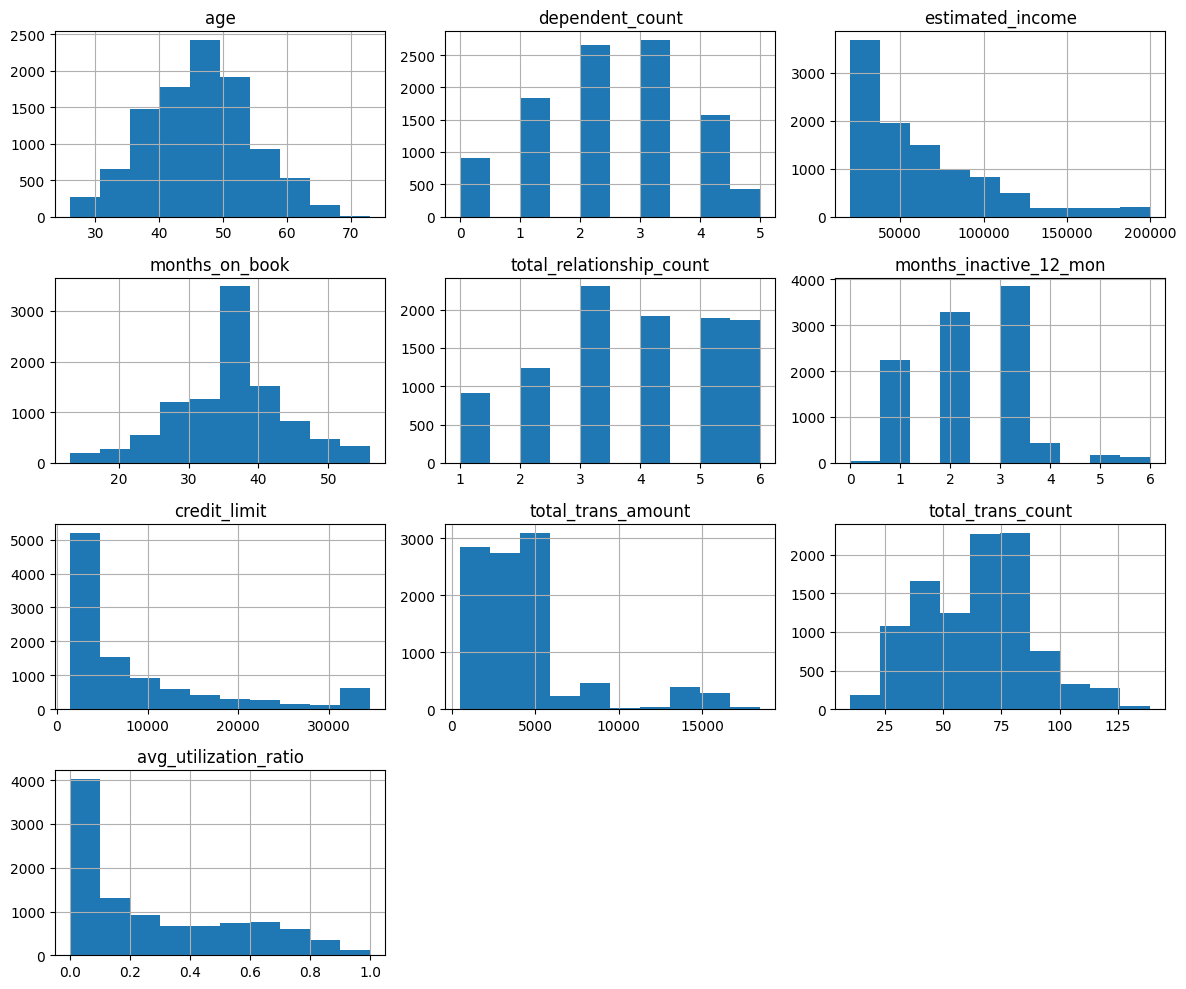

In [81]:
fig, ax = plt.subplots(figsize=(12, 10))
df.drop("customer_id", axis=1).hist(ax=ax)
plt.tight_layout()
plt.show();

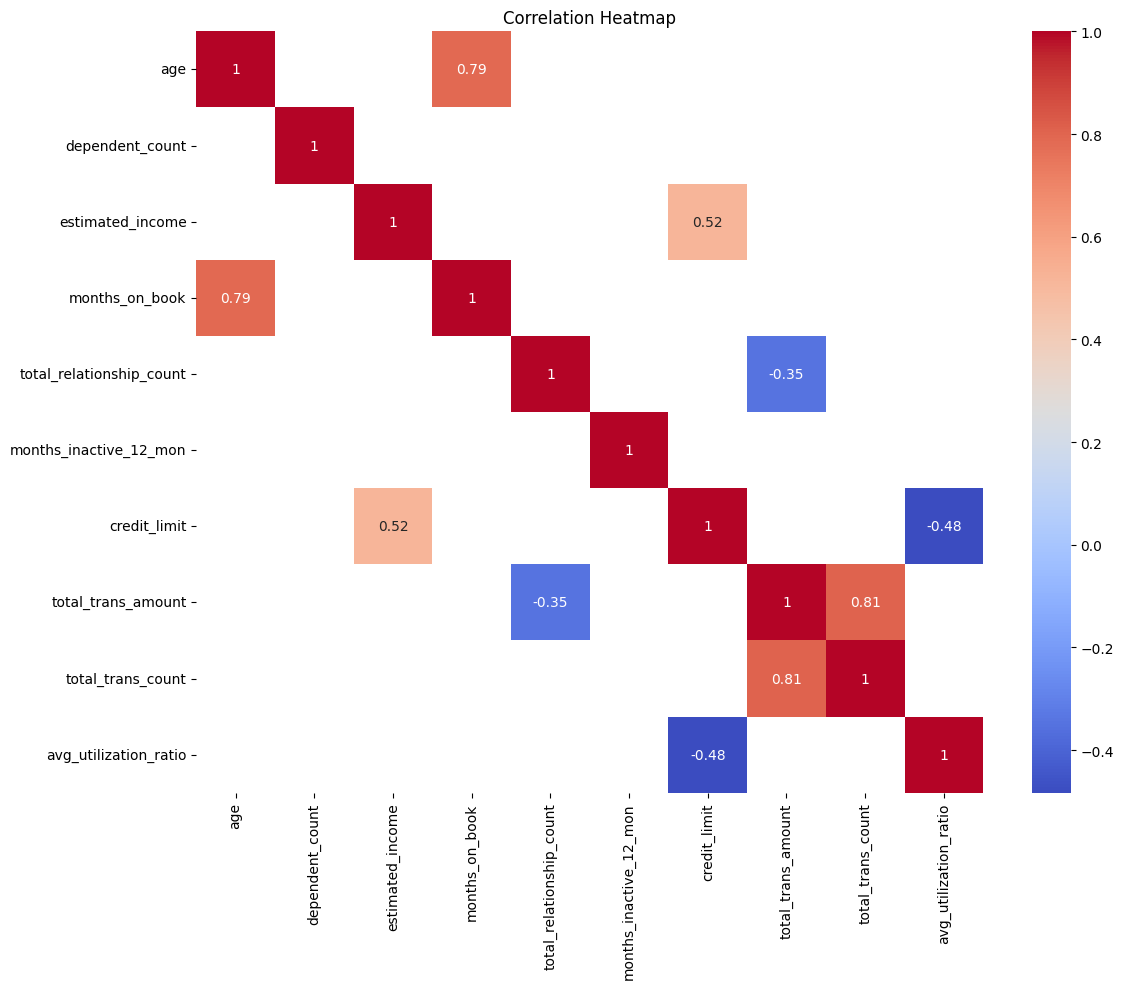

In [82]:
correlations = df.drop("customer_id", axis=1).corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12, 10))
# Strongest correlations only
sns.heatmap(correlations[(correlations > 0.30) | (correlations < -0.30)], annot=True, cmap="coolwarm", ax=ax) 

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show();

### Feature Engineering

In [83]:
customers_modification = df.copy()

# Convert gender to numerical values
customers_modification["gender"] = df["gender"].apply(lambda x: 1 if x == "M" else 0)
customers_modification.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [84]:
# Convert education_level to numerical values
education_mapping = {'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}
customers_modification["education_level"] = customers_modification["education_level"].map(education_mapping)
customers_modification.head()


,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


In [85]:
# Convert marital_status to numerical values
dummies = pd.get_dummies(customers_modification[["marital_status"]], prefix="marital_status") # Testing without drop_first=True

customers_modification = pd.concat([customers_modification, dummies], axis=1)
customers_modification.drop(["marital_status"], axis=1, inplace=True)

print(customers_modification.info())
customers_modification.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
 13  marital_status_Divorced   10127 non-null  bool   
 14  marita

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,False,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,False,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,False,True,False,False


### Data Scaling

In [89]:
X = customers_modification.drop(["customer_id"], axis=1)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled
# X_scaled.shape

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])